0.000245
0.005097
0.995401475146713
1.0104888888888888


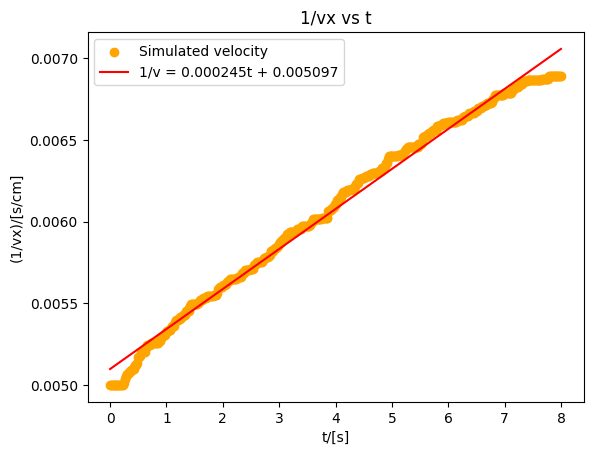

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

def linear_function(x, slope, intercept):
    return slope * x + intercept

##non-linear model

veldf = pd.read_csv("velocities.csv")
times = veldf["t"]
vx = veldf["vx"]
invx = 1/vx.values
times = times.values/1000.0


slope, intercept, r_value, p_value, std_err = linregress(times, invx)




x = np.linspace(0,8,8000)
y = linear_function(x,slope,intercept)

#physics data
slope = round(slope,6)
intercept = round(intercept,6)
sigma = 1800/(1280*580)
mass = 1000
l = 200

coeff = 2*mass*slope/(sigma*l)

print(slope)
print(intercept)
print(r_value)
print(coeff)
plt.scatter(times,invx, color='orange', label='Simulated velocity')
plt.plot(x,y, color='red', label=f'1/v = {slope}t + {intercept}')
plt.xlabel('t/[s]')
plt.ylabel('(1/vx)/[s/cm]')
plt.title('1/vx vs t')
plt.legend()
plt.savefig('speed_line.png', dpi=300, bbox_inches='tight')
plt.show()